In [1]:
from tensorflow import keras
from keras.models import load_model
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
# Aplica o tema básico do seaborn aos plots
sns.set_theme()

# Dataset MNIST, usado no curso 1
# Carregamento
dataset = keras.datasets.fashion_mnist.load_data()
# Descompactação das tuplas
(x_treino, y_treino), (x_teste, y_teste) = dataset
# Normalizando as entradas
x_treino_norm = (x_treino/255).astype(float)
x_teste_norm = (x_teste/255).astype(float)
# Valores de y distintos
total_de_classificacoes = len(np.unique(y_treino))

In [3]:
def treino_e_plot(modelo,
                  x_treino=x_treino_norm, y_treino=y_treino, x_teste=x_teste_norm, y_teste=y_teste):
    
    # Compilando o modelo
    modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # Ajustando o modelo
    historico = modelo.fit(x_treino_norm, y_treino, epochs=4, validation_split=0.20)
    
    # Performance
    perda_teste, acuracia_teste = modelo.evaluate(x_teste_norm, y_teste, verbose=0)
    print(f'Perda no conjunto de teste: {round(perda_teste, 4)}.')
    print(f'Acurácia no conjunto de teste: {round(acuracia_teste*100, 2)}%.')
    
    # Acurácia por época
    plt.figure(figsize=(12,6))
    plt.plot(historico.history['accuracy'], linewidth=3.5)
    plt.plot(historico.history['val_accuracy'], linewidth=3.5)
    plt.title('Variação das acurácias contra as épocas')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend(['Treino', 'Validação'])
    plt.show()
    
    # Perdas por época
    plt.figure(figsize=(12,6))
    plt.plot(historico.history['loss'], linewidth=3.5)
    plt.plot(historico.history['val_loss'], linewidth=3.5)
    plt.title('Variação das perdas contra as épocas')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.legend(['Treino', 'Validação'])
    plt.show()
    
    pass

# 01. Indo por dentro da rede neural

In [4]:
# Carregando o modelo da parte 1 do curso:
modelo = load_model('../deep_learning_parte_1_introducao_com_keras/modelo_epochs5_nodes5.h5')
# Exibindo o sumário do modelo carregado:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


O número de parâmetros na primeira camada Dense é igual a (784 + 1)*256. São 784 dimensões para cálculo dos pesos e uma para cálculo do viés.

In [5]:
# [0] --> flatten, [1] --> dropout, [2] --> dense, [3] --> dense_1
pesos_camada_dense = modelo.layers[2].get_weights()
print(f'{type(pesos_camada_dense)} e comprimento {len(pesos_camada_dense)}.')

<class 'list'> e comprimento 2.


# 02. Estudando os pesos e viéses

In [6]:
# Pesos
pesos_dense = pesos_camada_dense[0]
print(pesos_dense.shape)
# Viéses
vieses_dense = pesos_camada_dense[1]
print(vieses_dense.shape)

(784, 256)
(256,)


In [7]:
modelo.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.2,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_

Em 'class_name', dentro de 'kernel_initializer' para as camadas Dense, é possível ver o método usado pelo keras para iniciar os valores dos pesos. O GlorotUniform busca valores iniciais que não prejudiquem o aprendizado, seja por fornecer muita simetria à rede (nulos) ou por causar valores muito altos/baixos; o inicializador faz isso por meio de valores retirados de uma distribuição uniforme montada a partir do dataset.

https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf

https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotUniform

### Modelo regular
Modelo final da parte 1 do curso sem modificações, como base para comparações com as outras figuras.

Epoch 1/4
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5457 - accuracy: 0.8063 - val_loss: 0.4161 - val_accuracy: 0.8472
Epoch 2/4
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4189 - accuracy: 0.8489 - val_loss: 0.3944 - val_accuracy: 0.8553
Epoch 3/4
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3750 - accuracy: 0.8634 - val_loss: 0.3719 - val_accuracy: 0.8648
Epoch 4/4
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3563 - accuracy: 0.8689 - val_loss: 0.3380 - val_accuracy: 0.8773
Perda no conjunto de teste: 0.3601.
Acurácia no conjunto de teste: 86.95%.


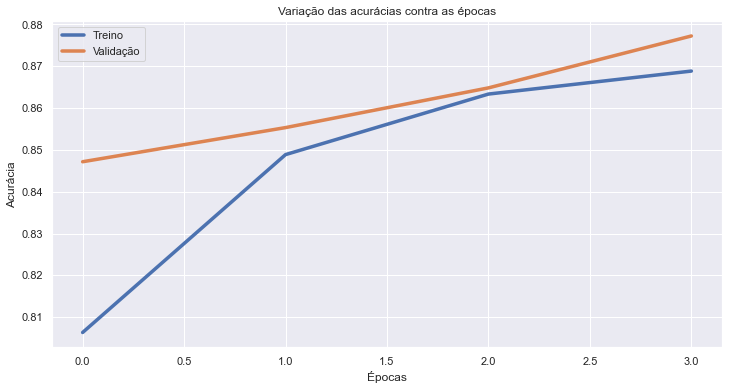

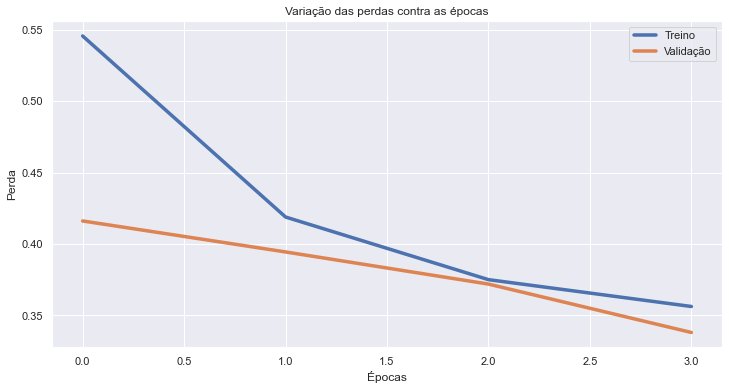

In [8]:
modelo = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(x_treino.shape[1], x_treino.shape[2])),
        keras.layers.Dropout(rate=0.2),
        keras.layers.Dense(units=256, activation=tf.nn.relu),
        keras.layers.Dense(total_de_classificacoes, activation=tf.nn.softmax)
    ]
)

treino_e_plot(modelo)

### Modelo com pesos iniciais nulos

Epoch 1/4
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3027 - accuracy: 0.1006 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 2/4
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3028 - val_accuracy: 0.0983
Epoch 3/4
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.1000 - val_loss: 2.3028 - val_accuracy: 0.1005
Epoch 4/4
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.0983
Perda no conjunto de teste: 2.3026.
Acurácia no conjunto de teste: 10.0%.


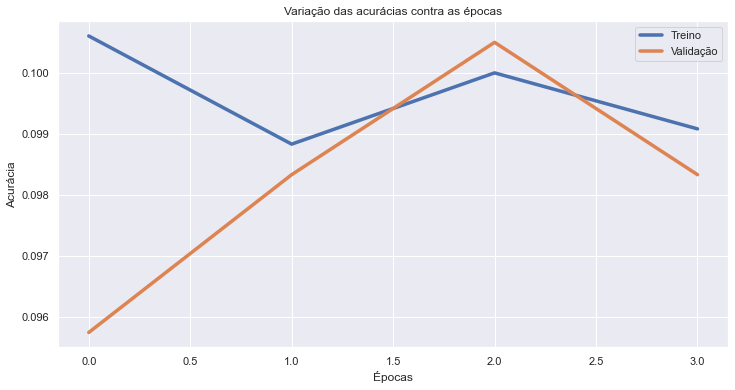

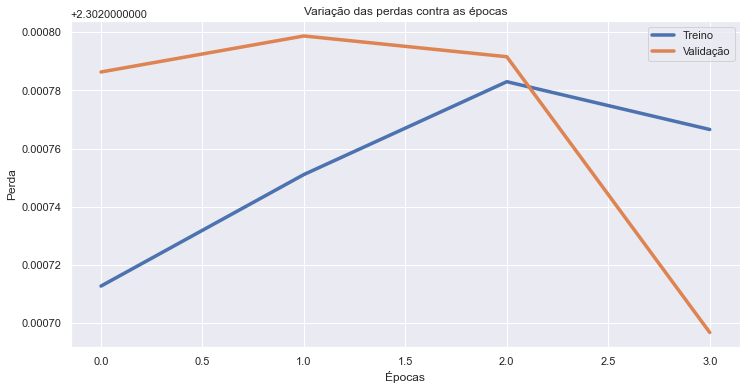

In [9]:
# Testando os resultados para valores inciais nulos nos pesos (apenas da primeira camada Dense):
modelo_pesos_zero = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(x_treino.shape[1], x_treino.shape[2])),
        keras.layers.Dropout(rate=0.2),
        keras.layers.Dense(units=256, activation=tf.nn.relu, kernel_initializer='zeros'),
        keras.layers.Dense(total_de_classificacoes, activation=tf.nn.softmax)
    ]
)

treino_e_plot(modelo_pesos_zero)

### Modelo com pesos iniciais aleatórios

Epoch 1/4
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5413 - accuracy: 0.8082 - val_loss: 0.4169 - val_accuracy: 0.8540
Epoch 2/4
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4158 - accuracy: 0.8484 - val_loss: 0.3922 - val_accuracy: 0.8541
Epoch 3/4
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3750 - accuracy: 0.8619 - val_loss: 0.3472 - val_accuracy: 0.8733
Epoch 4/4
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3528 - accuracy: 0.8695 - val_loss: 0.3435 - val_accuracy: 0.8738
Perda no conjunto de teste: 0.3612.
Acurácia no conjunto de teste: 86.93%.


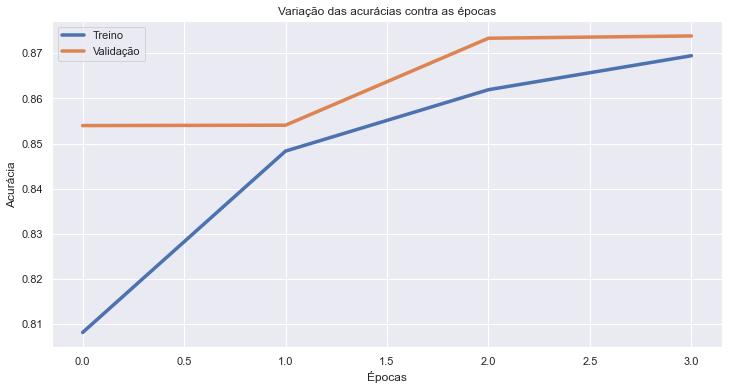

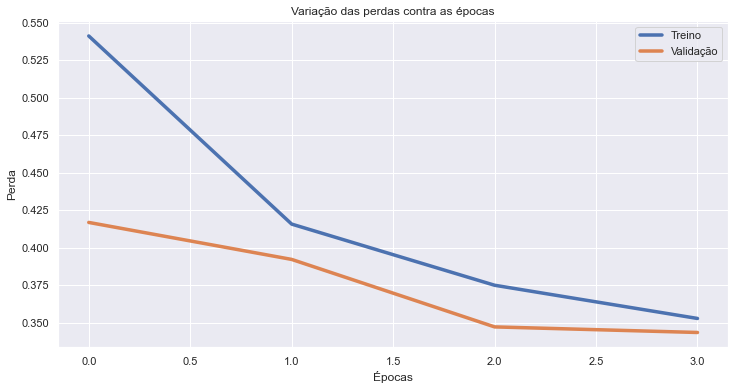

In [10]:
# Testando os resultados para valores inciais aleatórios nos pesos (apenas da primeira camada Dense):
modelo_pesos_aleatorios = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(x_treino.shape[1], x_treino.shape[2])),
        keras.layers.Dropout(rate=0.2),
        keras.layers.Dense(units=256, activation=tf.nn.relu, kernel_initializer='RandomNormal'),
        keras.layers.Dense(total_de_classificacoes, activation=tf.nn.softmax)
    ]
)

treino_e_plot(modelo_pesos_aleatorios)

Iniciando com nulos, a acurácia foi de 10%. Apesar disso, para valores aleatórios de uma distribuição normal ou uniforme (testei mas não deixei exposto) os valores são bem próximos aos do primeiro modelo, até porque mesmo com parâmetros bem definidos é uma distribuição uniforme.

# 03. Entendendo as unidades e buscando a menor perda

Olhando de volta ao retorno do get_config(), no começo da seção 2, é possível ver que os valores iniciais dos viéses são ajustados como nulos. Então só basta testar a opção aleatória.

Epoch 1/4
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5391 - accuracy: 0.8078 - val_loss: 0.4335 - val_accuracy: 0.8431
Epoch 2/4
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4126 - accuracy: 0.8494 - val_loss: 0.3641 - val_accuracy: 0.8683
Epoch 3/4
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3735 - accuracy: 0.8625 - val_loss: 0.3614 - val_accuracy: 0.8663
Epoch 4/4
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3497 - accuracy: 0.8715 - val_loss: 0.3323 - val_accuracy: 0.8807
Perda no conjunto de teste: 0.3535.
Acurácia no conjunto de teste: 87.04%.


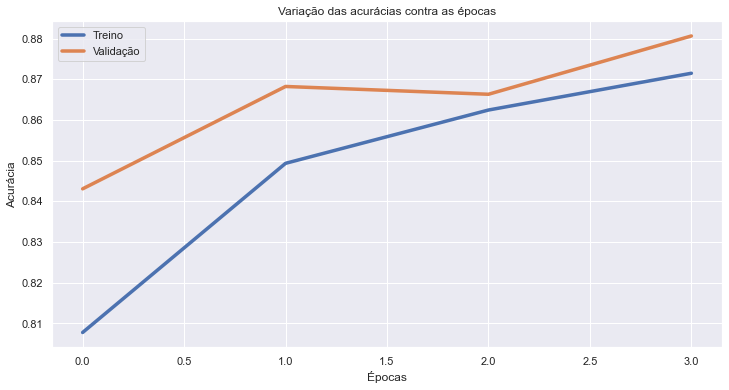

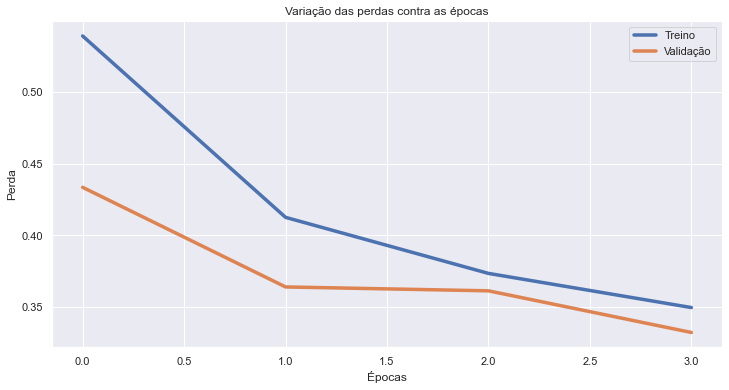

In [11]:
# Testando com iniciador aleatório para os viéses
# Testando os resultados para valores inciais aleatórios nos pesos (apenas da primeira camada Dense):
modelo_vieses_aleatorios = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(x_treino.shape[1], x_treino.shape[2])),
        keras.layers.Dropout(rate=0.2),
        keras.layers.Dense(units=256, activation=tf.nn.relu, bias_initializer='RandomNormal'),
        keras.layers.Dense(total_de_classificacoes, activation=tf.nn.softmax)
    ]
)

treino_e_plot(modelo_vieses_aleatorios)

O valor dos inicial dos viéses parece praticamente não interferer no resultado final e o algoritmo se adapta bem a eles.

# 05. Testando os hiperparâmetros da rede

É possível realizar alguns outros ajustes no modelo por meio de hiperparâmetros ou funções implementadas pelo Keras, que não necessariamente melhorarão o modelo e aqui possuem um intuito de conhecer a API.

In [12]:
# Mudando taxa de aprendizado do otimizador Adam (padrão = 0.001)
otim = keras.optimizers.Adam(lr=0.0011)
# Configurando callbacks (earlystop --> para quando não há variação da perda de validação)
callbks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=1),
    keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5', monitor='val_loss', save_best_only=True)
]

C:\Users\Adolfo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [13]:
# Usando o modelo sem modificações
modelo = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(x_treino.shape[1], x_treino.shape[2])),
        keras.layers.Dropout(rate=0.2),
        keras.layers.Dense(units=256, activation=tf.nn.relu),
        keras.layers.Dense(total_de_classificacoes, activation=tf.nn.softmax)
    ]
)
# Compilando
modelo.compile(optimizer=otim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Colocando um batch_size de 25% do comprimento dos dados de treino e ajustando
historico = modelo.fit(x_treino_norm, y_treino, batch_size=int(1*len(x_treino_norm)*(1-0.20)), 
                       epochs=50, validation_split=0.20, callbacks=callbks, verbose=0)

In [14]:
# Performance
perda_teste, acuracia_teste = modelo.evaluate(x_teste_norm, y_teste, verbose=0)
print(f'Perda no conjunto de teste: {round(perda_teste, 4)}.')
print(f'Acurácia no conjunto de teste: {round(acuracia_teste*100, 2)}%.')

Perda no conjunto de teste: 0.5146.
Acurácia no conjunto de teste: 82.31%.
